# Deep Learning for Brain Tumor Detection in MRI Scans

## <span style='border-left: 4px solid #FF5733; padding-left: 10px;'> 📖 Table of Contents </span> 📌

1. 🔍 [`About The Data`](#data)
2. 🛠 [`Imports & Setup`](#imports)
3. 📂 [`Data Loading & Preprocessing`](#import_data)
4. 📊 [`Data Visualization`](#vis)
5. 🔄 [`Data Processing`](#DP)
6. 🏗 [`First CNN Model`](#CNN)
7. 🏗 [`Pretrained CNN Model`](#CNN2)
8. 📈 [`Comparison of Models`](#compare)
9. ✅ [`End of Notebook`](#end)

---
This notebook guides you through a complete deep learning workflow for brain tumor detection in MRI scans. You'll learn about the data, see how it's prepared and visualized, and follow the step-by-step process of building, training, and evaluating both a custom and a pretrained CNN model. Finally, we compare the results to highlight the strengths of each approach.

✍️ **Author**: Data Rangers

<a name='data'>

# 1️⃣ <span style='color:#007BFF'>|</span> 🧠 **About The Data**  

## 📍 **1.1 | What is a Brain Tumor?** 🏥
A **brain tumor** refers to an abnormal collection or mass of cells within the brain. The skull, which encloses the brain, has limited space, and any growth within this confined area can lead to complications. Brain tumors can be **cancerous (malignant)** or **noncancerous (benign)**. As benign or malignant tumors grow, they can increase the pressure inside the skull. This elevated pressure can cause brain damage and pose a **life-threatening risk**.

---

### 🎯 **1.1.1 | Importance of Brain Tumor Classification** 🎗
✅ Early detection and classification of brain tumors are **crucial** in medical imaging.  
✅ Accurate classification **helps doctors** choose the best treatment options.  
✅ It has the **potential to save lives** through **early intervention**.

---

### 🛠 **1.1.2 | Methods Used** 🧪
🔹 Deep learning has **revolutionized healthcare**, making diagnoses **more accurate**.  
🔹 According to the **World Health Organization (WHO)**, a good diagnosis requires:
   - **Tumor detection** 🏥  
   - **Identifying tumor location** 📍  
   - **Classification based on malignancy, grade, and type** 🏷  

👉 **This study uses a Convolutional Neural Network (CNN)-based approach** for tumor classification and segmentation in **Magnetic Resonance Imaging (MRI)**. Instead of multiple models, a **single CNN model** is used for different classification tasks.

---

## 🔍 **1.2 | Project Workflow** 🏗  
This project follows three main steps:  

1️⃣ **Implementing a Custom CNN Model** 🛠  
   - A **Convolutional Neural Network (CNN)** is built **from scratch** to classify brain tumors.  

2️⃣ **Applying a Pretrained Model** 📦  
   - A **transfer learning approach** is used by applying a **pretrained CNN model** (ResNet50).  

3️⃣ **Comparing the Results** 📊  
   - The performance of both models is compared in terms of **accuracy, precision, recall, and F1-score**.  

---

## 📂 **1.3 | About the Dataset** 📊
This dataset is a combination of **three datasets**: figshare, Br35H, and one removed due to **bad data**.

### 📜 **1.3.1 | Dataset Description** 🗂
🧠 **7023 MRI brain images** categorized into **4 classes**:  
✅ **Glioma**: Cancerous **brain tumors in glial cells**.  
✅ **Meningioma**: Non-cancerous **tumors from the meninges**.  
✅ **No Tumor**: **Normal brain scans** without detectable tumors.  
✅ **Pituitary**: Tumors in the **pituitary gland**, which can be cancerous or not.  

🎯 The goal is to use **machine learning** to advance **neurology research**, improve **diagnostic accuracy**, and **enhance treatment** strategies.  

ℹ️ The **"No Tumor"** class images come from the **Br35H dataset**.

🔗 [**Brain Tumor Dataset on Kaggle**](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)  

---


<a name='imports'>

# 📦 2. <span style='color:#007BFF'>|</span> 🧠 **Imports & Setup**  

In [ ]:
import numpy as np
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import classification_report, confusion_matrix
import random
import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications import ResNet50


<a name='import_data'>

# 📂 3. <span style='color:#007BFF'>|</span> 🧠 **Data Loading & Preprocessing**  

**🔽 3.1 | Downloading & Defining Dataset Paths**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:07<00:00, 20.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [ ]:
# Define the correct dataset path
DATASET_PATH = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"
# Set training and testing directories
train_dir = os.path.join(DATASET_PATH, "Training")
test_dir = os.path.join(DATASET_PATH, "Testing")

**📊 3.2 | Image Count per Class**

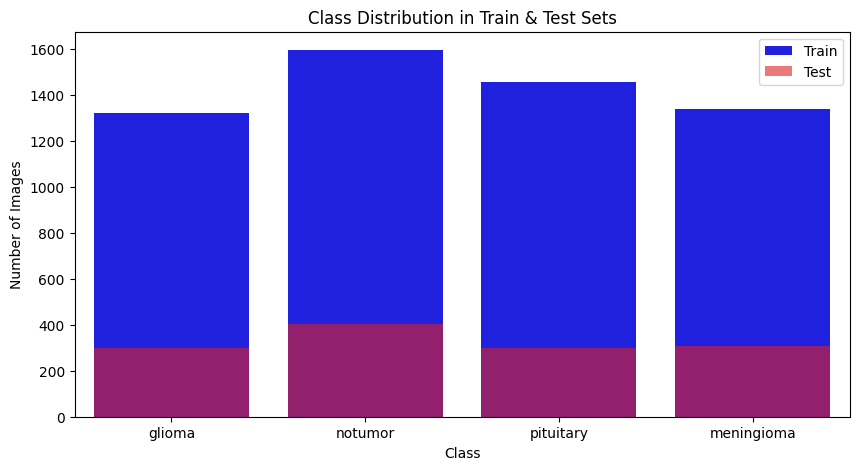

In [ ]:
# Function to count images per class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get counts for each set
train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

# Convert to lists
labels = list(train_counts.keys())
train_values = list(train_counts.values())
test_values = list(test_counts.values())

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=train_values, color='blue', label='Train')
sns.barplot(x=labels, y=test_values, color='red', alpha=0.6, label='Test')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Train & Test Sets")
plt.legend()
plt.show()


**🖼 3.3 | Display Sample Images**

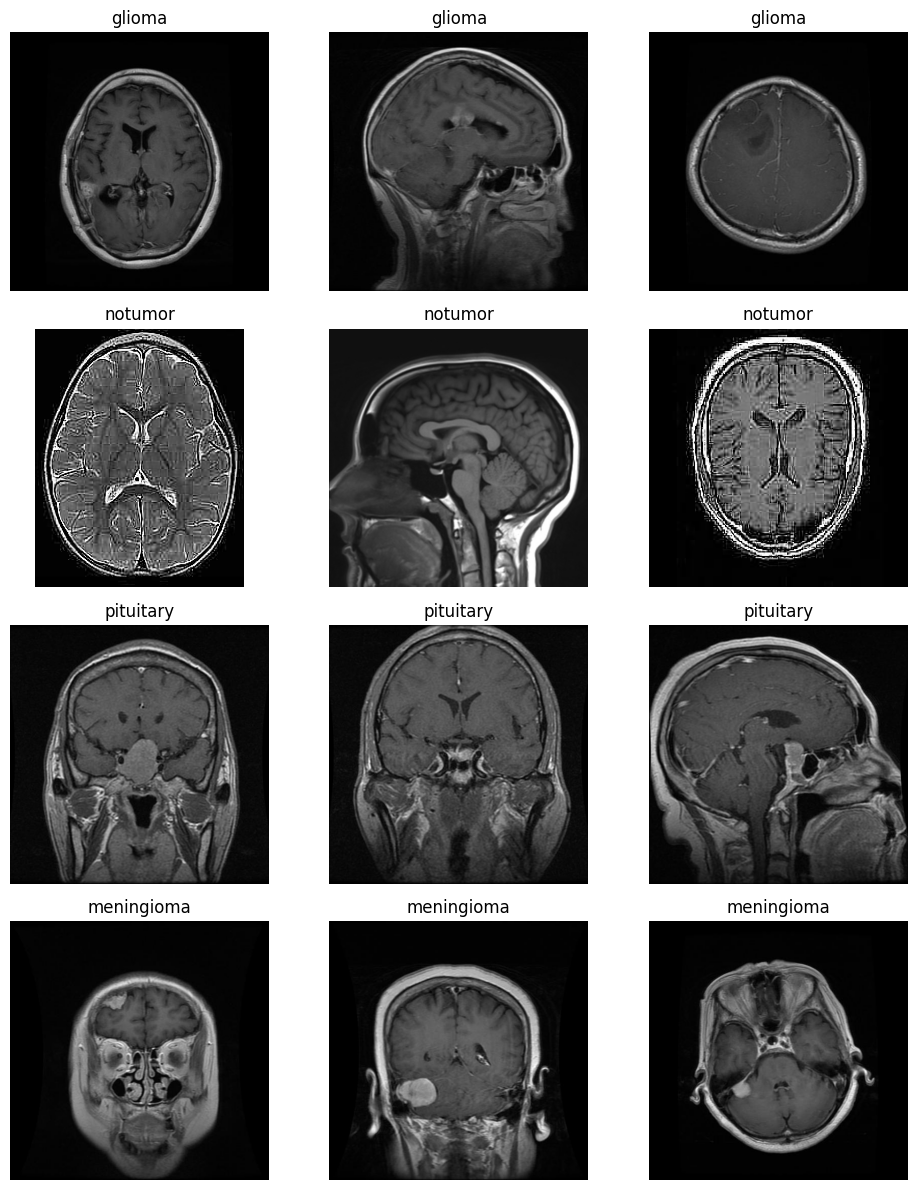

In [ ]:
# Function to display images
def show_images_per_class(directory, num_samples=3):
    classes = os.listdir(directory)
    plt.figure(figsize=(10, len(classes) * 3))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(directory, class_name)
        image_files = os.listdir(class_path)
        sample_images = random.sample(image_files, min(num_samples, len(image_files)))

        for j, image_name in enumerate(sample_images):
            img_path = os.path.join(class_path, image_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Show images from training data
show_images_per_class(train_dir)


**📐 3.4 | Image Size Distribution**

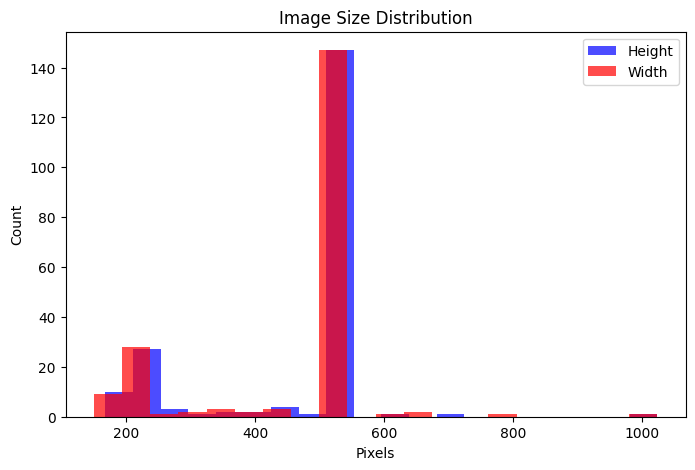

In [ ]:
image_shapes = []

# Collect image sizes
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path)[:50]:  # Limit to avoid overloading
        img_path = os.path.join(class_path, image_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_shapes.append(img.shape[:2])  # Only height & width

# Convert to numpy for easy analysis
image_shapes = np.array(image_shapes)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(image_shapes[:, 0], bins=20, alpha=0.7, label="Height", color="blue")
plt.hist(image_shapes[:, 1], bins=20, alpha=0.7, label="Width", color="red")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.title("Image Size Distribution")
plt.legend()
plt.show()


# **Image Size Distribution Analysis**
Before training our model, we analyzed the distribution of image sizes in our dataset to assess the need for preprocessing. The histogram above illustrates the distribution of image widths and heights.

# Observations:
**Dominant Image Size (~600x600 pixels)**

*   The majority of images in the dataset had a standard size around 600 pixels for both width and height. This suggests a prevalent resolution among the dataset sources.

**Presence of Small Images (<300 pixels)**

*   A portion of the dataset contained images with significantly smaller dimensions (between 100 and 300 pixels).
*   Such variations could introduce inconsistencies in the model’s input representation, leading to potential biases or performance degradation.


**Outliers (>800 pixels)**

*   A few images exceeded 800 pixels in width or height.
*   These large images could increase computational costs and may not provide additional useful information compared to the standard-sized images.


# Preprocessing Decision: Resizing to 224x224
To ensure a consistent input size for our deep learning model and improve computational efficiency, we resized all images to 224x224 pixels.
This choice aligns with common CNN architectures such as ResNet, VGG, and MobileNet, which typically operate on 224x224 image inputs. Resizing also helps standardize feature extraction across all images, preventing model biases due to varying resolutions.

By performing this preprocessing step, we established a homogeneous dataset, ensuring that all images contribute equally to the model’s learning process.

**✂️ 3.5 | Image Resizing**

### 🎯 Objective:
Resize all dataset images to a standard **224x224 pixels** while preserving the original aspect ratio.

### 📌 Method Used:
- **Bilinear interpolation** for optimal resizing.
- **Black padding** added to maintain the aspect ratio without distortion.
- **Batch processing**: All images from the training and test directories are resized automatically.

In [ ]:
# Define target image size
IMG_SIZE = (224, 224)

def resize_with_padding(img, size=IMG_SIZE):
    """ Resize image while maintaining aspect ratio with padding. """
    h, w = img.shape[:2]
    scale = min(size[0] / w, size[1] / h)

    new_w = int(w * scale)
    new_h = int(h * scale)

    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    delta_w = size[0] - new_w
    delta_h = size[1] - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    padded_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    return padded_img

def resize_images_in_directory(source_dir, target_dir):
    """ Resize all images in a directory and save them with padding. """
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        class_target_path = os.path.join(target_dir, class_name)

        if not os.path.exists(class_target_path):
            os.makedirs(class_target_path)

        for image_name in tqdm(os.listdir(class_source_path), desc=f"Resizing {class_name}"):
            image_path = os.path.join(class_source_path, image_name)
            img = cv2.imread(image_path)

            if img is not None:
                img_resized = resize_with_padding(img, IMG_SIZE)
                cv2.imwrite(os.path.join(class_target_path, image_name), img_resized)

# Define new paths for resized dataset
resized_train_dir = "/content/resized_dataset/Training"
resized_test_dir = "/content/resized_dataset/Testing"

# Apply resizing
resize_images_in_directory(train_dir, resized_train_dir)
resize_images_in_directory(test_dir, resized_test_dir)

print("✅ Resizing Completed! Images are now 224x224 with preserved aspect ratio.")


Resizing meningioma: 100%|██████████| 306/306 [00:00<00:00, 369.90it/s]

✅ Resizing Completed! Images are now 224x224 with preserved aspect ratio.


<a name='vis'>

# 📊 4. <span style='color:#007BFF'>|</span> 🧠 **Data Visualization**  

**✂️ 4.1 | Number of Images per Brain Tumor Type**

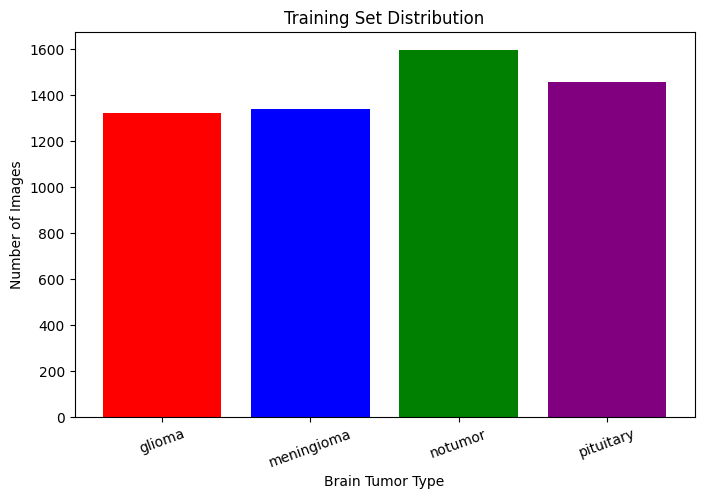

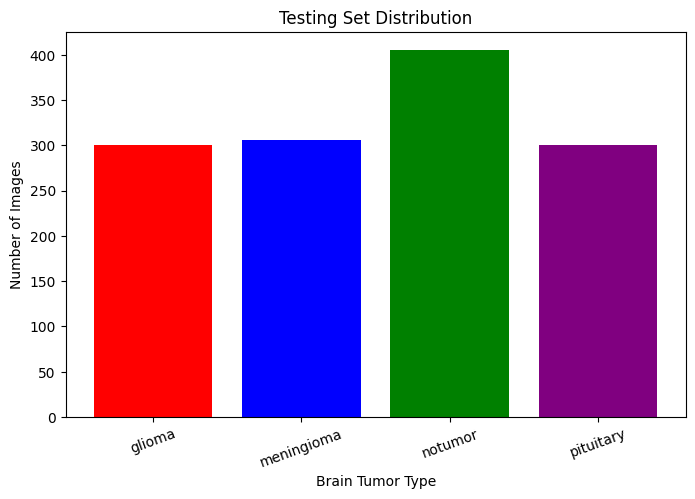

In [ ]:
def plot_class_distribution(directory, title):
    class_counts = {}

    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            class_counts[category] = len(os.listdir(category_path))

    # Sorting by class name for better visualization
    class_counts = dict(sorted(class_counts.items()))

    plt.figure(figsize=(8, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color=['red', 'blue', 'green', 'purple'])
    plt.xlabel("Brain Tumor Type")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=20)
    plt.show()

# ✅ Plot distributions
plot_class_distribution(resized_train_dir, "Training Set Distribution")
plot_class_distribution(resized_test_dir, "Testing Set Distribution")


**✂️ 4.2 | Images from resized training dataset**

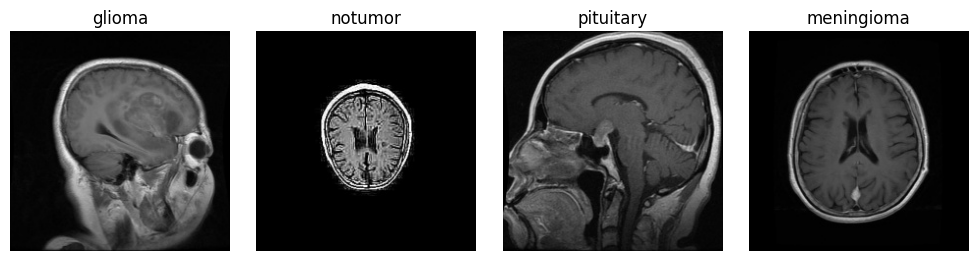

In [ ]:
def show_sample_images(directory, num_images=4):
    plt.figure(figsize=(10, 5))
    categories = os.listdir(directory)

    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            img_name = random.choice(os.listdir(category_path))
            img_path = os.path.join(category_path, img_name)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img) / 255.0  # Normalize for display

            plt.subplot(2, 4, i+1)
            plt.imshow(img_array)
            plt.title(category)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# ✅ Show sample images from resized training dataset
show_sample_images(resized_train_dir)


<a name='DP'>

# 🔄 5. <span style='color:#007BFF'>|</span> 🧠 **Data Processing**  

In [ ]:
# Define improved data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Random rotation
    width_shift_range=0.2,    # Horizontal shift
    height_shift_range=0.2,   # Vertical shift
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Random zoom
    brightness_range=[0.8, 1.2],  # Brightness variation
    horizontal_flip=True,     # Flip images horizontally
    validation_split=0.1      # 10% validation split
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    resized_train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    resized_train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Test data (No augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    resized_test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ✅ Print class labels
print("Class Labels:", train_generator.class_indices)


Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class Labels: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow.keras import optimizers, regularizers, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Define optimizers with proper regularization and parameters
optimizers_dict = {
    "SGD": optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    "Adam": optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4),
    "AdamW": optimizers.AdamW(learning_rate=0.0001, weight_decay=1e-4),
    "RMSprop": optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-4)
}

# Store results with timing and metrics
results = {
    "names": [],
    "train_acc": [],
    "val_acc": [],
    "train_loss": [],
    "val_loss": [],
    "times": []
}

# Define the new architecture
def build_model(input_shape=(224, 224, 3), num_classes=4):
    model = models.Sequential([
        # Stem Block
        layers.Conv2D(32, (7,7), strides=2, padding='same',
                      activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, strides=2),

        # Convolutional Blocks
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Classifier Head
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Train and evaluate with each optimizer
for opt_name, opt in optimizers_dict.items():
    print(f"\n=== Training with {opt_name} ===")
    start_time = time.time()

    model = build_model(input_shape=(224, 224, 3), num_classes=4)  # Create model instance for each optimizer

    model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    # Early stopping based on validation loss
    es = EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    )

    # Learning rate scheduler
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6
    )

    history = model.fit(
        train_generator,
        epochs=10,  # Use early stopping to prevent overfitting
        validation_data=val_generator,
        callbacks=[es, reduce_lr],
        verbose=1
    )
    results["names"].append(opt_name)
    results["train_acc"].append(history.history['accuracy'][-1])
    results["val_acc"].append(history.history['val_accuracy'][-1])
    results["train_loss"].append(history.history['loss'][-1])
    results["val_loss"].append(history.history['val_loss'][-1])
    results["times"].append(time.time() - start_time)
    # Store metrics



=== Training with SGD ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 91s 543ms/step - accuracy: 0.5321 - loss: 1.0855 - val_accuracy: 0.2548 - val_loss: 1.9581 - learning_rate: 0.0010
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 85s 526ms/step - accuracy: 0.6632 - loss: 0.8435 - val_accuracy: 0.2583 - val_loss: 2.5149 - learning_rate: 0.0010
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 84s 522ms/step - accuracy: 0.7076 - loss: 0.7626 - val_accuracy: 0.5044 - val_loss: 1.1489 - learning_rate: 0.0010
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 531ms/step - accuracy: 0.7445 - loss: 0.6774 - val_accuracy: 0.5852 - val_loss: 1.0193 - learning_rate: 0.0010
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 86s 537ms/step - accuracy: 0.7650 - loss: 0.6199 - val_accuracy: 0.4236 - val_loss: 1.8391 - learning_rate: 0.0010
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 85s 529ms/step - accuracy: 0.7847 - loss: 0.5756 - val_accuracy: 0.4815 - val_loss: 1.3580 - learning_rate: 0.0010
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 85s 526ms/step - accuracy: 0.8201 - loss

In [ ]:
print(results["names"])

['SGD', 'Adam', 'AdamW', 'RMSprop']


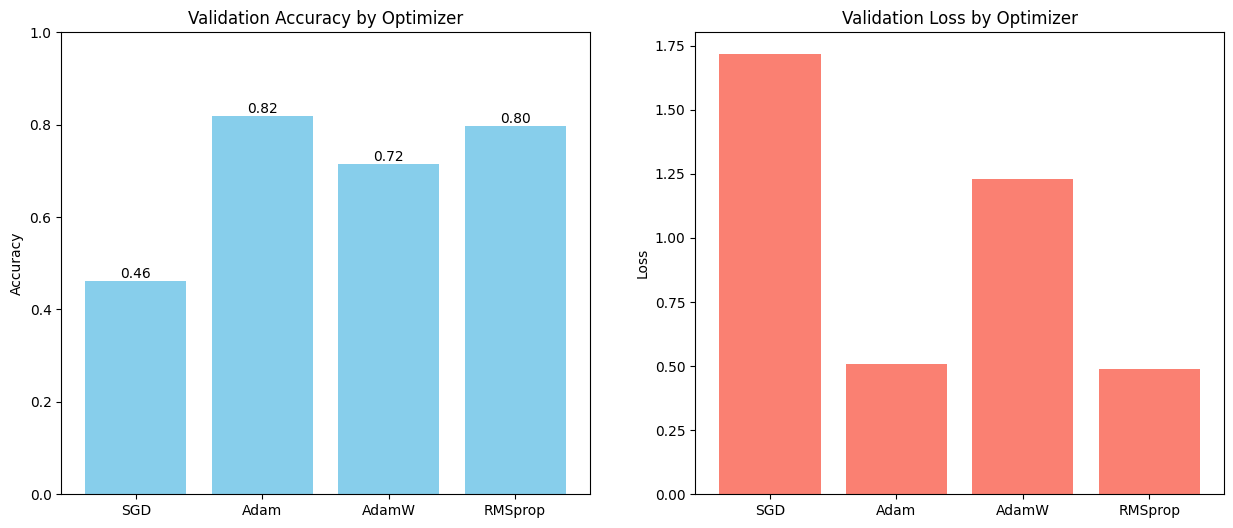

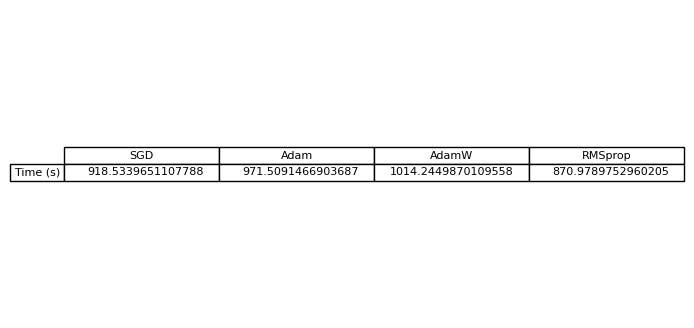


=== Overfitting Analysis ===
SGD:
  Train/Val Acc: 0.85/0.46
  Overfitting Gap: 0.39
  Loss Ratio (Train/Val): 0.26

Adam:
  Train/Val Acc: 0.87/0.82
  Overfitting Gap: 0.05
  Loss Ratio (Train/Val): 0.75

AdamW:
  Train/Val Acc: 0.87/0.72
  Overfitting Gap: 0.15
  Loss Ratio (Train/Val): 0.31

RMSprop:
  Train/Val Acc: 0.87/0.80
  Overfitting Gap: 0.07
  Loss Ratio (Train/Val): 0.77



In [ ]:


# Visualization
plt.figure(figsize=(15, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
bars = plt.bar(results["names"], results["val_acc"], color='skyblue')
plt.title('Validation Accuracy by Optimizer')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

# Loss Plot
plt.subplot(1, 2, 2)
plt.bar(results["names"], results["val_loss"], color='salmon')
plt.title('Validation Loss by Optimizer')
plt.ylabel('Loss')

# Timing Table
plt.figure(figsize=(8, 4))
plt.table(cellText=[results["times"]],
          rowLabels=['Time (s)'],
          colLabels=results["names"],
          loc='center')
plt.axis('off')

plt.show()

# Print overfitting analysis
print("\n=== Overfitting Analysis ===")
for i, name in enumerate(results["names"]):
    gap = results["train_acc"][i] - results["val_acc"][i]
    print(f"{name}:")
    print(f"  Train/Val Acc: {results['train_acc'][i]:.2f}/{results['val_acc'][i]:.2f}")
    print(f"  Overfitting Gap: {gap:.2f}")
    print(f"  Loss Ratio (Train/Val): {results['train_loss'][i]/results['val_loss'][i]:.2f}\n")


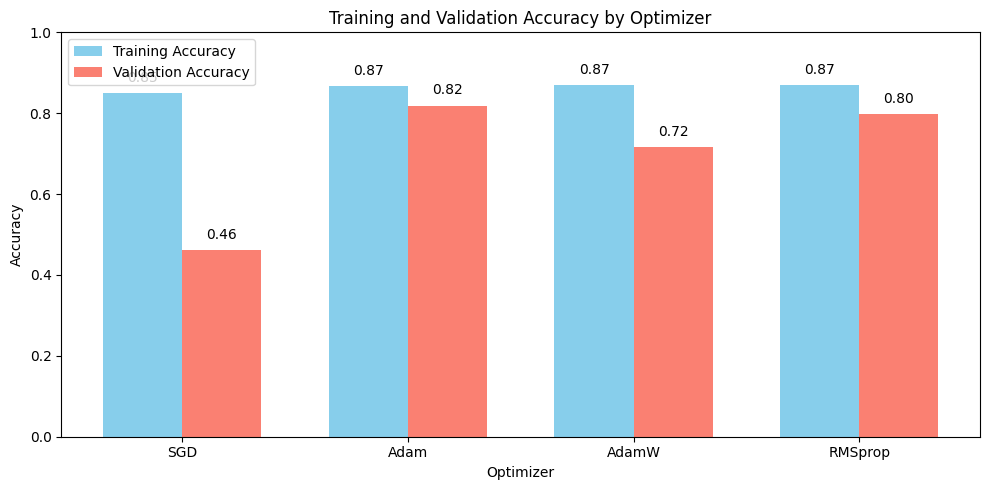

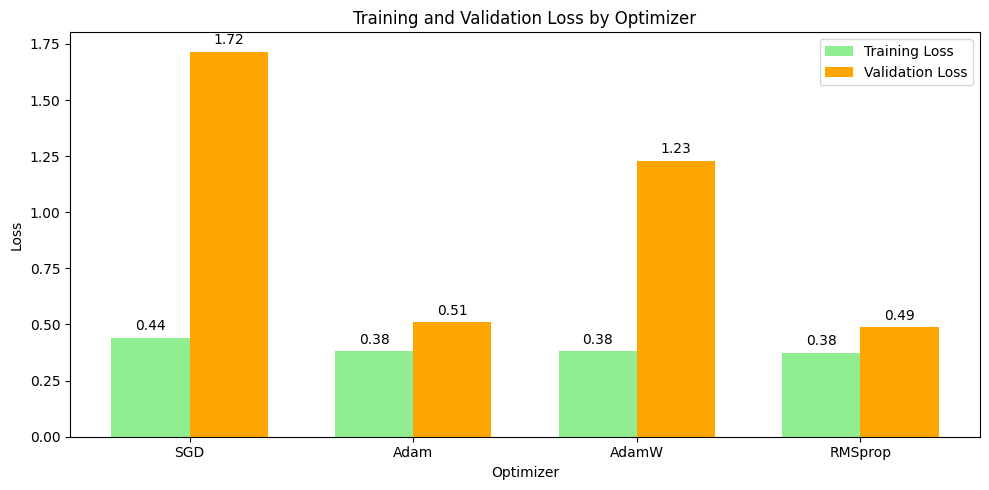

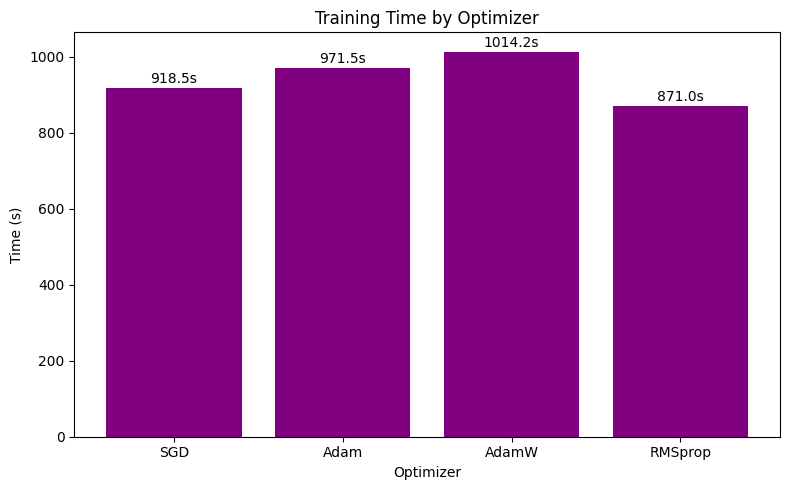

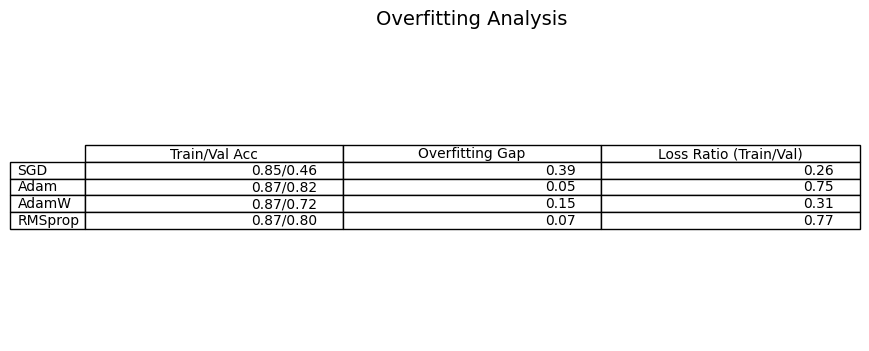

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Validation Accuracy and Training Accuracy
plt.figure(figsize=(10, 5))
x = np.arange(len(results["names"]))  # Optimizer names as x-axis
width = 0.35  # Width of the bars

# Plot training and validation accuracy
plt.bar(x - width/2, results["train_acc"], width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, results["val_acc"], width, label='Validation Accuracy', color='salmon')

# Add labels and title
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Optimizer')
plt.xticks(x, results["names"])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.legend()

# Annotate bars with values
for i, (train_acc, val_acc) in enumerate(zip(results["train_acc"], results["val_acc"])):
    plt.text(i - width/2, train_acc + 0.02, f'{train_acc:.2f}', ha='center', va='bottom')
    plt.text(i + width/2, val_acc + 0.02, f'{val_acc:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, results["train_loss"], width, label='Training Loss', color='lightgreen')
plt.bar(x + width/2, results["val_loss"], width, label='Validation Loss', color='orange')

# Add labels and title
plt.xlabel('Optimizer')
plt.ylabel('Loss')
plt.title('Training and Validation Loss by Optimizer')
plt.xticks(x, results["names"])
plt.legend()

# Annotate bars with values
for i, (train_loss, val_loss) in enumerate(zip(results["train_loss"], results["val_loss"])):
    plt.text(i - width/2, train_loss + 0.02, f'{train_loss:.2f}', ha='center', va='bottom')
    plt.text(i + width/2, val_loss + 0.02, f'{val_loss:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. Training Time
plt.figure(figsize=(8, 5))
plt.bar(results["names"], results["times"], color='purple')

# Add labels and title
plt.xlabel('Optimizer')
plt.ylabel('Time (s)')
plt.title('Training Time by Optimizer')

# Annotate bars with values
for i, time_taken in enumerate(results["times"]):
    plt.text(i, time_taken + 5, f'{time_taken:.1f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Overfitting Analysis Table
plt.figure(figsize=(10, 4))
cell_text = []
for i, name in enumerate(results["names"]):
    gap = results["train_acc"][i] - results["val_acc"][i]
    loss_ratio = results["train_loss"][i] / results["val_loss"][i]
    cell_text.append([
        f"{results['train_acc'][i]:.2f}/{results['val_acc'][i]:.2f}",
        f"{gap:.2f}",
        f"{loss_ratio:.2f}"
    ])

plt.table(cellText=cell_text,
          rowLabels=results["names"],
          colLabels=['Train/Val Acc', 'Overfitting Gap', 'Loss Ratio (Train/Val)'],
          loc='center')
plt.title('Overfitting Analysis', fontsize=14)
plt.axis('off')
plt.show()

# **🔍 Optimizer Comparison: Which One Works Best?**
We tested **four optimizers** (SGD, Adam, AdamW, RMSprop) to see how well they train our model. Let's break it down!

# **🔹 1. Stochastic Gradient Descent (SGD)**
**✅ Train Accuracy:** 85%

**❌ Validation Accuracy:** 46%

**⚠️ Overfitting Gap:** 39% (Huge!)

**📉 Loss Ratio (Train/Val):** 0.26 (Very low)

**🔴 Conclusion:** Overfitting Alert!
- The model memorizes training data instead of learning useful patterns.
- Validation accuracy is too low → It fails on new data.

# **🔹 2. Adam Optimizer**
**✅ Train Accuracy:** 87%

**✅ Validation Accuracy:** 82%

**🟢 Overfitting Gap:** 5% (Very small 🎉)

**📉 Loss Ratio (Train/Val):**  0.75 (Balanced)

**✅ Conclusion:** Best Generalization!

- The model performs well on both training and validation data.
- Overfitting is minimal, meaning the model learns useful features.

**🤩 Why is Adam so good?**

✔️ Adaptive learning rate → Adjusts automatically.

✔️ Regularization works well → Prevents overfitting.

# **🔹 3. AdamW Optimizer**
**✅ Train Accuracy:** 87%

**⚠️ Validation Accuracy:** 72%

**🟠 Overfitting Gap:** 15% (Moderate)

**📉 Loss Ratio (Train/Val):** 0.31 (Not ideal)

**🟡 Conclusion:** Some Overfitting

- Better than SGD but still not perfect.
- Model struggles a bit with new data.

# **🔹 4. RMSprop Optimizer**
**✅ Train Accuracy:** 87%

**✅ Validation Accuracy:** 80%

**🟢 Overfitting Gap:** 7% (Small)

**📉 Loss Ratio (Train/Val):** 0.77 (Balanced)

**✅ Conclusion:** Great Generalization!

- Performs almost as well as Adam.
- Stable training and good validation accuracy.

**🤩 Why is RMSprop good?**

✔️ Adaptive learning rate → Learns efficiently.

✔️ Balanced training → No severe overfitting.



# 🚀 Why Choose Adam?
**✅ Best Generalization**

📊 Train/Val Accuracy: 0.87/0.82

- The accuracy gap is only 5% (smallest among all optimizers).
- This means the model is not overfitting and performs well on unseen data.

**⚖️ Balanced Loss Ratio**

📉 Loss Ratio (Train/Val): 0.75

- The training loss is close to the validation loss.
- Confirms good learning and no overfitting.

**🔄 Adaptive Learning Rate**
- Adam automatically adjusts the learning rate during training.
- This helps it converge faster and more reliably than SGD.

**🔥 Consistency Across Tasks**
- Adam works well on various datasets and problems.
- It's a stable and reliable choice for optimization.

<a name='CNN'>

# 🏗 6. <span style='color:#007BFF'>|</span> 🧠 **First CNN Model**

In [ ]:
# Define CNN model
model_CNN = models.Sequential([
      layers.Conv2D(32, (7,7), strides=2, padding='same',
                      activation='relu', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, strides=2),

        # Convolutional Blocks
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Classifier Head
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
])

# Compile model
model_CNN.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train model
history = model_CNN.fit(
    train_generator,
    epochs=30,  # Adjust based on performance
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Save model
model_CNN.save("CC_best_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 579ms/step - accuracy: 0.5907 - loss: 0.9997 - val_accuracy: 0.2548 - val_loss: 3.2060 - learning_rate: 1.0000e-04
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 91s 563ms/step - accuracy: 0.7329 - loss: 0.7060 - val_accuracy: 0.2619 - val_loss: 6.1673 - learning_rate: 1.0000e-04
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 576ms/step - accuracy: 0.7676 - loss: 0.6241 - val_accuracy: 0.2636 - val_loss: 5.2326 - learning_rate: 1.0000e-04
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 91s 564ms/step - accuracy: 0.8006 - loss: 0.5521 - val_accuracy: 0.4359 - val_loss: 2.0404 - learning_rate: 1.0000e-04
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 91s 563ms/step - accuracy: 0.8217 - loss: 0.4938 - val_accuracy: 0.3620 - val_loss: 2.5179 - learning_rate: 1.0000e-04
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 90s 556ms/step - accuracy: 0.8396 - loss: 0.4597 - val_accuracy: 0.6011 - val_loss: 1.2659 - learning_rate: 1.0000e-04
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 89s 550ms/step - 

<a name='CNN2'>

# 🏗 7. <span style='color:#007BFF'>|</span> 🧠 **Pretrained CNN Model**

### 2- Brain Tumor ResNet50: Pre-trained model

In [ ]:
# Load ResNet50 model with pre-trained weights
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Unfreeze some layers in the base model
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Build the model
model_ResNet50 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model_ResNet50.compile(Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('Bmodel.h5', monitor='val_loss', save_best_only=True)

# Model summary
model_ResNet50.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 23,797,380 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Fit the model
history1 = model_ResNet50.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.5890 - loss: 1.1136

161/161 ━━━━━━━━━━━━━━━━━━━━ 191s 799ms/step - accuracy: 0.5899 - loss: 1.1112 - val_accuracy: 0.2478 - val_loss: 1.4966
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.8737 - loss: 0.3578

161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 619ms/step - accuracy: 0.8738 - loss: 0.3576 - val_accuracy: 0.3392 - val_loss: 1.4338
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 574ms/step - accuracy: 0.9187 - loss: 0.2365 - val_accuracy: 0.3163 - val_loss: 1.6069
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.9479 - loss: 0.1633

161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 621ms/step - accuracy: 0.9479 - loss: 0.1632 - val_accuracy: 0.4306 - val_loss: 1.4019
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.9570 - loss: 0.1241

161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 635ms/step - accuracy: 0.9570 - loss: 0.1241 - val_accuracy: 0.5694 - val_loss: 1.0514
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9587 - loss: 0.1195

161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 636ms/step - accuracy: 0.9588 - loss: 0.1194 - val_accuracy: 0.6643 - val_loss: 0.9188
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.9756 - loss: 0.0753

161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 645ms/step - accuracy: 0.9756 - loss: 0.0753 - val_accuracy: 0.7715 - val_loss: 0.6353
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9690 - loss: 0.0912

161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 623ms/step - accuracy: 0.9690 - loss: 0.0911 - val_accuracy: 0.8770 - val_loss: 0.3955
Epoch 9/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.9786 - loss: 0.0705

161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 635ms/step - accuracy: 0.9786 - loss: 0.0705 - val_accuracy: 0.8717 - val_loss: 0.3497
Epoch 10/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.9844 - loss: 0.0545

161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 632ms/step - accuracy: 0.9844 - loss: 0.0545 - val_accuracy: 0.9420 - val_loss: 0.2304
Epoch 11/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 605ms/step - accuracy: 0.9857 - loss: 0.0473 - val_accuracy: 0.8893 - val_loss: 0.3802
Epoch 12/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.9842 - loss: 0.0545

161/161 ━━━━━━━━━━━━━━━━━━━━ 101s 628ms/step - accuracy: 0.9842 - loss: 0.0545 - val_accuracy: 0.9543 - val_loss: 0.1639
Epoch 13/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9813 - loss: 0.0561

161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 623ms/step - accuracy: 0.9813 - loss: 0.0561 - val_accuracy: 0.9684 - val_loss: 0.1414
Epoch 14/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 599ms/step - accuracy: 0.9886 - loss: 0.0340 - val_accuracy: 0.9455 - val_loss: 0.2401
Epoch 15/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.9872 - loss: 0.0481

161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 633ms/step - accuracy: 0.9872 - loss: 0.0481 - val_accuracy: 0.9736 - val_loss: 0.1372
Epoch 16/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 137s 603ms/step - accuracy: 0.9942 - loss: 0.0229 - val_accuracy: 0.9666 - val_loss: 0.1626
Epoch 17/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 96s 598ms/step - accuracy: 0.9927 - loss: 0.0296 - val_accuracy: 0.9719 - val_loss: 0.1446
Epoch 18/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 95s 590ms/step - accuracy: 0.9961 - loss: 0.0156 - val_accuracy: 0.9649 - val_loss: 0.1578
Epoch 19/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.9917 - loss: 0.0313

161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 633ms/step - accuracy: 0.9917 - loss: 0.0313 - val_accuracy: 0.9754 - val_loss: 0.1180
Epoch 20/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 95s 588ms/step - accuracy: 0.9914 - loss: 0.0248 - val_accuracy: 0.9649 - val_loss: 0.1652
Epoch 21/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 602ms/step - accuracy: 0.9926 - loss: 0.0206 - val_accuracy: 0.9684 - val_loss: 0.1638
Epoch 22/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 96s 597ms/step - accuracy: 0.9901 - loss: 0.0239 - val_accuracy: 0.9649 - val_loss: 0.1237
Epoch 23/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 590ms/step - accuracy: 0.9938 - loss: 0.0184 - val_accuracy: 0.9736 - val_loss: 0.1304
Epoch 24/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 599ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9596 - val_loss: 0.1576


<a name='compare'>

# 📈 8. <span style='color:#007BFF'>|</span> 🧠 **Comparison of Models**  

### 1- Simple CNN

In [ ]:
test_loss, test_acc = model_CNN.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.7793 - loss: 0.5689
Test Accuracy: 86.27%


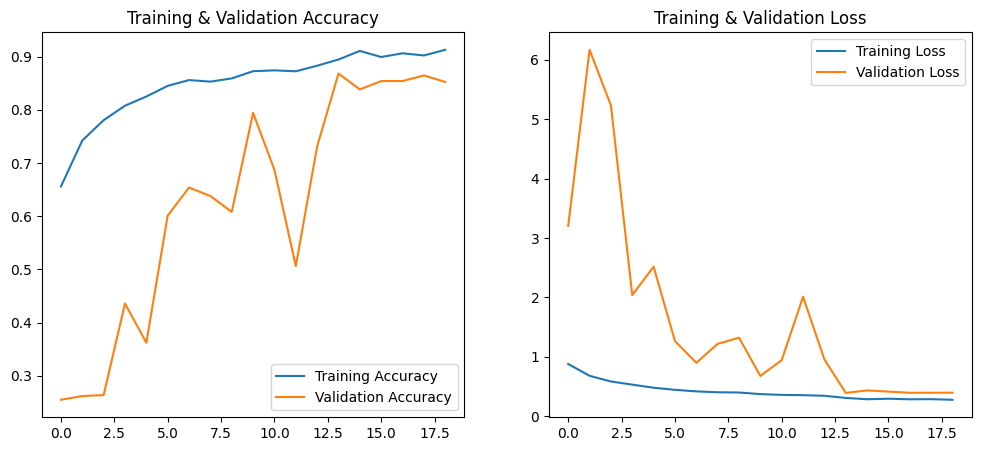

In [ ]:
# Plot accuracy and loss graphs
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # Accuracy Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

# ✅ Call the function
plot_training_curves(history)


# Interpretation of the CNN Model 📊
The first model is a custom CNN built from scratch. Let's analyze its performance based on the first set of graphs:

**1️⃣ Training & Validation Accuracy 📈**

- The training accuracy steadily increases, reaching above 90%.
- The validation accuracy fluctuates more but follows the same increasing trend, stabilizing around 85-88%.

**2️⃣ Training & Validation Loss 📉**

- The training loss continuously decreases, which is a good sign.
- The validation loss fluctuates significantly before stabilizing, suggesting the model struggles with generalization.

### 2- Brain Tumor ResNet50: Pre-trained model

In [ ]:
# Evaluate on test data
test_loss, test_acc = model_ResNet50.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.9868 - loss: 0.0424
Test Accuracy: 99.01%


In [ ]:
# ✅ Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

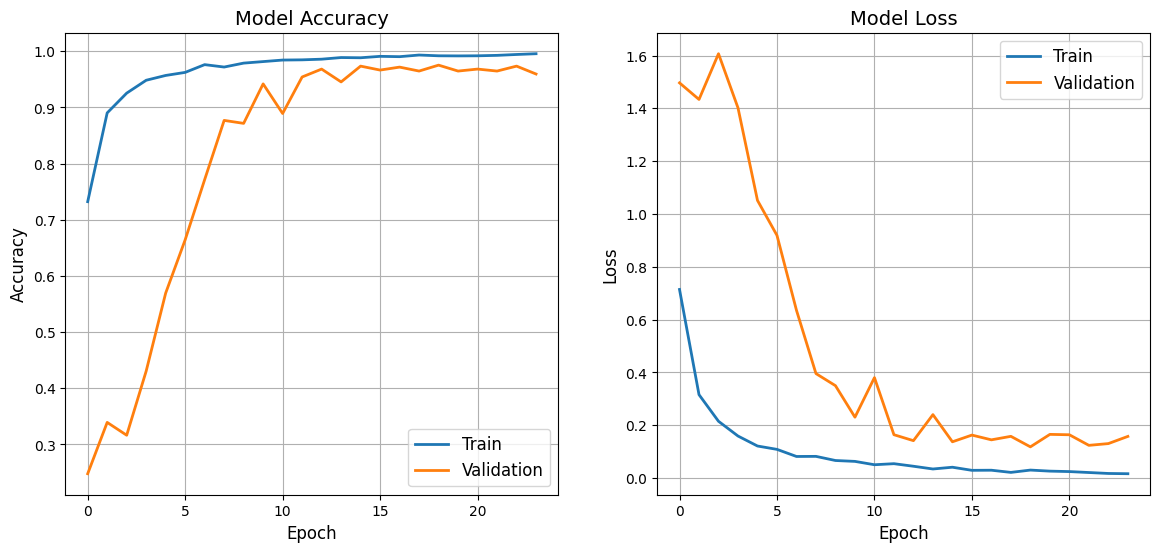

In [ ]:
plt.figure(figsize=(14, 6))  # Increase width

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train', linewidth=2)
plt.plot(history1.history['val_accuracy'], label='Validation', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train', linewidth=2)
plt.plot(history1.history['val_loss'], label='Validation', linewidth=2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


# Interpretation of the Pre-trained ResNet50 Model 🏗️
The second model uses ResNet50 as a feature extractor. Let's analyze the second set of graphs:

**1️⃣ Model Accuracy 📊**

- The training accuracy increases rapidly and reaches almost 100% after a few epochs.
- The validation accuracy also rises steeply and remains close to training accuracy (~95%), suggesting strong generalization.

**2️⃣ Model Loss 📉**

- Both training and validation loss decrease steadily.
- The validation loss stabilizes without major fluctuations, meaning the model is less prone to overfitting compared to the custom CNN.
- This suggests that the pre-trained model is learning more efficiently and is likely benefiting from transfer learning.

In [ ]:
# ✅ Make Predictions
y_pred_probs = model_ResNet50.predict(test_generator)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class index
y_true = test_generator.classes  # True labels

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step


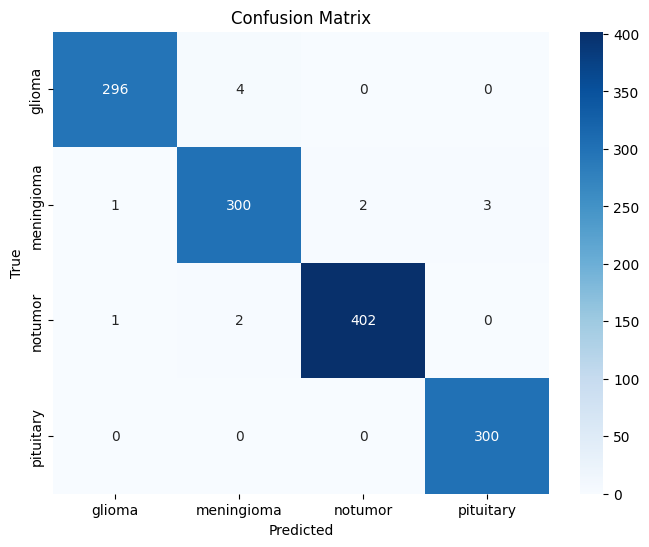

In [ ]:
# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ✅ Classification Report
labels = list(test_generator.class_indices.keys())  # Get class names
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

      glioma       0.99      0.99      0.99       300
  meningioma       0.98      0.98      0.98       306
     notumor       1.00      0.99      0.99       405
   pituitary       0.99      1.00      1.00       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



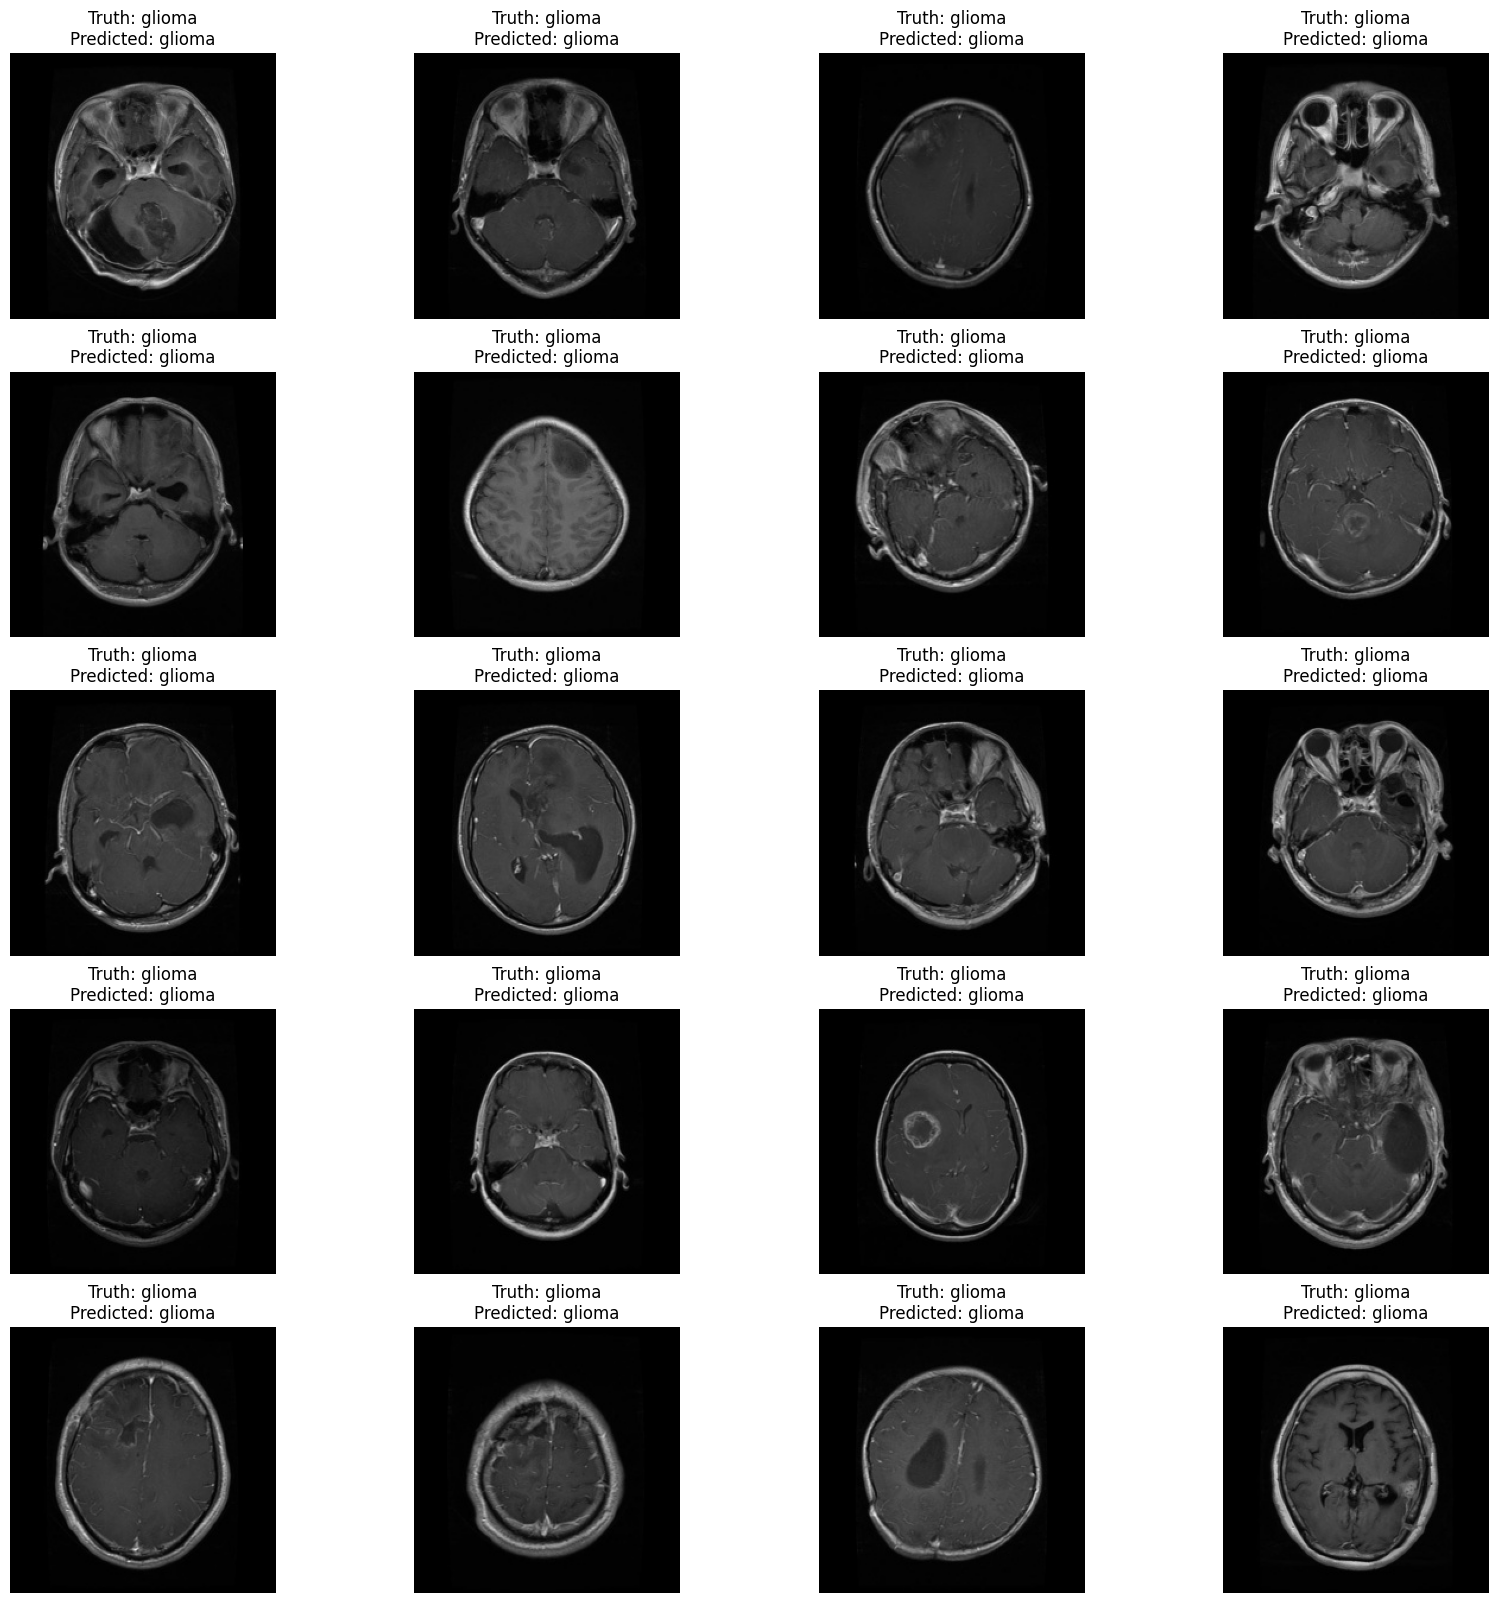

In [ ]:
# ✅ Visualizing Model Predictions
plt.figure(figsize=(20, 20))
X_test_images, _ = next(test_generator)  # Extract batch of images

for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(X_test_images[i])
    plt.title(f"Truth: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}")
    plt.axis('off')

plt.show()


# 1.   Training & Validation Accuracy Comparison:
**📌 CNN Model:**

*   Training accuracy gradually increases, but validation accuracy fluctuates a lot.
*   The model learns training data well but struggles with generalization.

**📌 ResNet50:**

*   Training accuracy starts very high (~90%) and quickly reaches almost 100%
*   Validation accuracy follows closely, showing good generalization and stability.
- This suggests that ResNet50 has better feature extraction due to its pretrained weights.

✅ **Conclusion:** ResNet50 outperforms the CNN model in terms of validation accuracy and generalization. The CNN model struggles with consistent validation performance, likely due to limited feature extraction capability compared to ResNet50.

# 2.   Training & Validation Loss Comparison:

**📌 CNN Model:**

*   Training loss decreases steadily.
*   Validation loss decreases but fluctuates.

**📌 ResNet50:**

*   Training loss starts low and quickly stabilizes.
*   Validation loss decreases significantly and remains stable.
- The validation loss is consistently low, meaning the model generalizes well and does not overfit.

✅ **Conclusion:** ResNet50 learns more efficiently and avoids overfitting, while the CNN model needs more regularization (e.g., dropout, batch normalization).

# 3.   Why is ResNet50 Better?

*   **Better Feature Extraction:** ResNet50 is trained on ImageNet, so it already has a strong understanding of patterns.
*   **Deeper Architecture:** ResNet50 has skip connections, allowing it to learn complex features without vanishing gradients.
- **Regularization & Pretraining:** Pretrained models act as a strong baseline, requiring fewer training epochs and preventing overfitting.

# Final Conclusion
**📌 CNN Model:**

*   Struggles with generalization.
*   Needs improvements (data augmentation, dropout, better architecture).

**📌 ResNet50:**

*   Learns quickly with higher stability.
*   Best choice when pretrained features are relevant to the task.

✅ **Verdict: ResNet50 is significantly better** in terms of both accuracy and loss, making it the preferred model for this task.